In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/anz/anaconda3/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def gen(num_train=1000,num_feature=5):
    gen_graph =  tf.Graph()
    with gen_graph.as_default():
        w = tf.random_normal([num_feature,1])
        b = tf.Variable(np.random.rand())
        x = tf.random_normal(shape=[num_train,num_feature])
        y = tf.matmul(x,w)+b
    with tf.Session(graph=gen_graph) as sess:
        sess.run(tf.global_variables_initializer())
        x,y,w,b =sess.run([x,y,w,b])
        return x,y,w,b

In [5]:
# X : matrix mxn
# w : matrix nx1
# y : matrix mx1
# b : scalar
def linreg(x,y,iterations=10000,lr=0.01):
    num_train = x.shape[0]
    num_feature = x.shape[1]
    losses = []
    w = tf.Variable(tf.zeros([num_feature,1]))
    b = tf.Variable(np.random.rand())
    x_t = tf.placeholder(tf.float32,shape=[None,num_feature])
    y_true = tf.placeholder(tf.float32,shape=[None,1])
    y_t = tf.matmul(x_t,w)+b
    loss = 0.5 * tf.reduce_mean(tf.square(y_t-y_true),0)
    update_w = w.assign(tf.subtract(w,tf.matmul(tf.transpose(x),(y_t-y_true))*(1.0/num_train)*lr))
    update_b = b.assign(tf.subtract(b,tf.reduce_mean(y_t-y_true)*lr))
    with tf.Session(graph=tf.get_default_graph()) as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(iterations):
            _loss,_w,_b,_x,_u,_b=sess.run([loss,w,b,x_t,update_w,update_b],feed_dict={x_t : x,y_true : y})
            losses.append(_loss)
            print(_loss)
    plt.plot(losses)
    plt.show()
    print('Prediction w ',_w)
    print('Prediction b ',_b)
    
        
        

[3.5906]
[3.5175562]
[3.4459987]
[3.3758993]
[3.3072271]
[3.239952]
[3.1740482]
[3.1094844]
[3.0462372]
[2.984276]
[2.9235766]
[2.8641138]
[2.8058605]
[2.7487936]
[2.6928878]
[2.6381216]
[2.5844688]
[2.531909]
[2.480418]
[2.4299765]
[2.380561]
[2.3321514]
[2.2847269]
[2.2382681]
[2.1927547]
[2.1481674]
[2.104488]
[2.0616972]
[2.0197775]
[1.9787108]
[1.9384805]
[1.8990684]
[1.8604585]
[1.8226346]
[1.7855794]
[1.7492788]
[1.713717]
[1.6788789]
[1.6447494]
[1.6113142]
[1.5785601]
[1.5464718]
[1.5150366]
[1.4842411]
[1.454072]
[1.424517]
[1.395563]
[1.367198]
[1.33941]
[1.3121874]
[1.2855188]
[1.2593925]
[1.2337978]
[1.2087241]
[1.1841601]
[1.1600959]
[1.1365212]
[1.1134257]
[1.0908]
[1.068635]
[1.0469202]
[1.0256474]
[1.0048076]
[0.98439133]
[0.9643903]
[0.94479614]
[0.9256002]
[0.90679485]
[0.888372]
[0.87032384]
[0.8526426]
[0.83532065]
[0.81835145]
[0.80172706]
[0.7854408]
[0.7694855]
[0.7538549]
[0.73854184]
[0.7235403]
[0.7088436]
[0.6944458]
[0.680341]
[0.6665225]
[0.6529853]
[0.639

[1.8287412e-06]
[1.7922332e-06]
[1.756536e-06]
[1.7215955e-06]
[1.6873023e-06]
[1.6536137e-06]
[1.6205704e-06]
[1.5881667e-06]
[1.5564206e-06]
[1.5252766e-06]
[1.4948536e-06]
[1.4649712e-06]
[1.4357698e-06]
[1.4070044e-06]
[1.3788908e-06]
[1.3513431e-06]
[1.3243125e-06]
[1.2979333e-06]
[1.2719718e-06]
[1.2465384e-06]
[1.2216677e-06]
[1.1972627e-06]
[1.1734269e-06]
[1.1500125e-06]
[1.1270553e-06]
[1.1046066e-06]
[1.0826614e-06]
[1.0611385e-06]
[1.0398829e-06]
[1.0191424e-06]
[9.987854e-07]
[9.788216e-07]
[9.593382e-07]
[9.402351e-07]
[9.213815e-07]
[9.029857e-07]
[8.849395e-07]
[8.6731535e-07]
[8.5005223e-07]
[8.3300495e-07]
[8.163953e-07]
[8.000864e-07]
[7.8409977e-07]
[7.685267e-07]
[7.532076e-07]
[7.381777e-07]
[7.2347353e-07]
[7.0900114e-07]
[6.948096e-07]
[6.810671e-07]
[6.674792e-07]
[6.541876e-07]
[6.4107877e-07]
[6.283918e-07]
[6.1576617e-07]
[6.034976e-07]
[5.914437e-07]
[5.79631e-07]
[5.681043e-07]
[5.5680516e-07]
[5.457092e-07]
[5.3483734e-07]
[5.2421944e-07]
[5.1376884e-07]


[6.158719e-11]
[6.158021e-11]
[6.158821e-11]
[6.1570436e-11]
[6.15512e-11]
[6.149842e-11]
[6.149496e-11]
[6.150871e-11]
[6.151801e-11]
[6.1509776e-11]
[6.1480605e-11]
[6.148941e-11]
[6.145662e-11]
[6.145905e-11]
[6.14529e-11]
[6.144167e-11]
[6.14444e-11]
[6.143681e-11]
[6.1457034e-11]
[6.143786e-11]
[6.142977e-11]
[6.140844e-11]
[6.138646e-11]
[6.139881e-11]
[6.1369014e-11]
[6.139455e-11]
[6.141553e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.1431915e-11]
[6.14319

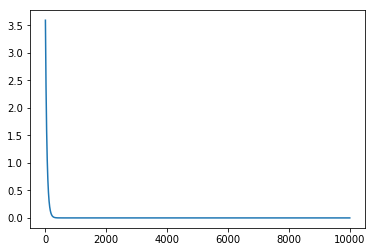

Prediction w  [[-1.4363936 ]
 [-0.06552964]
 [ 1.0013477 ]
 [-1.0696229 ]
 [ 1.6708313 ]]
Prediction b  0.8473183
Real w values  [[-1.4363993 ]
 [-0.06553004]
 [ 1.0013521 ]
 [-1.0696278 ]
 [ 1.6708373 ]]
Real b values  0.8473211


In [6]:
x,y,w,b=gen()
linreg(x,y)
print('Real w values ',w)
print('Real b values ',b)